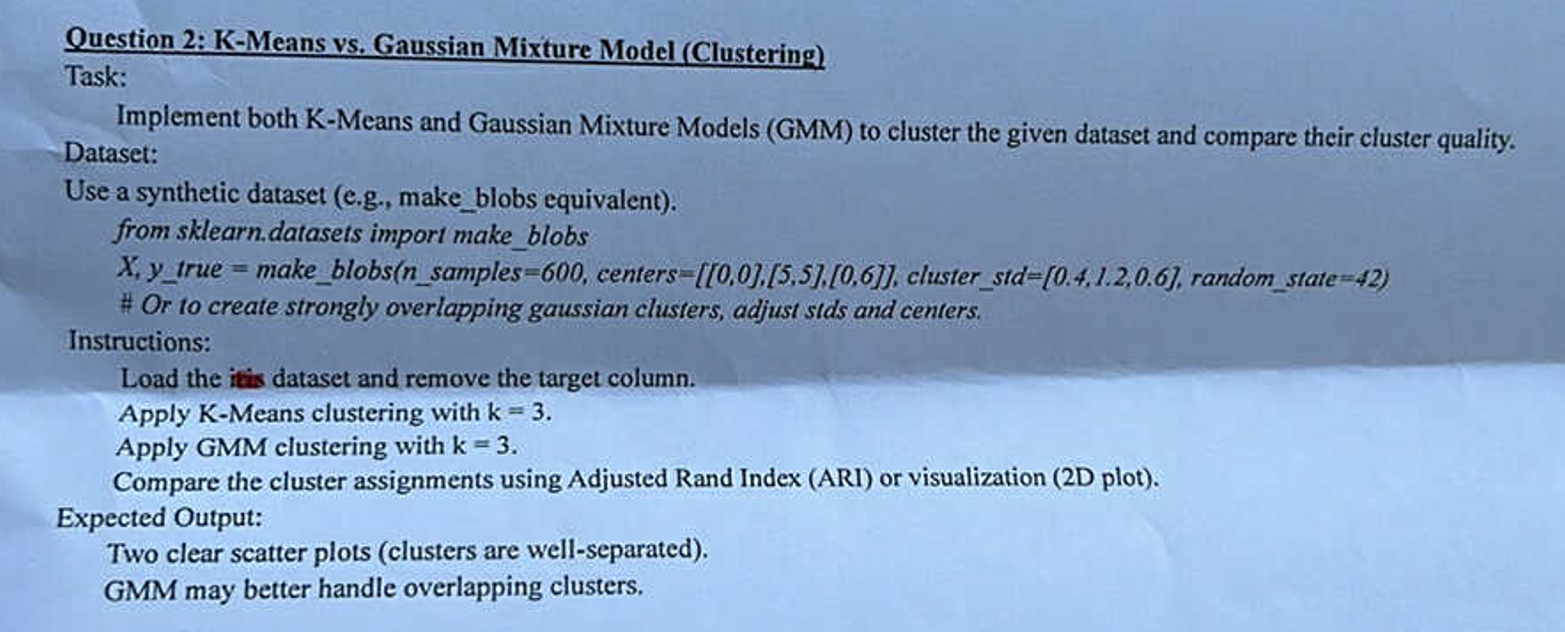

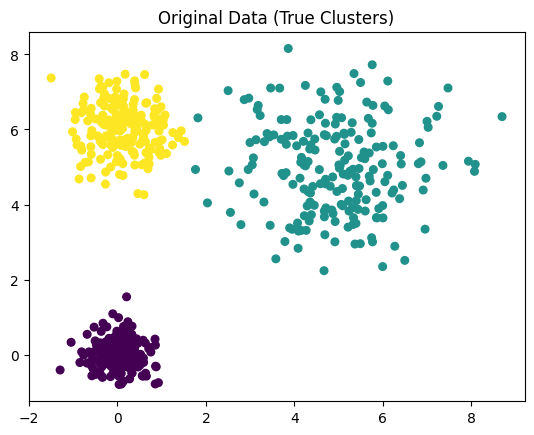

C:\Users\Israk\AppData\Local\Temp\ipykernel_15832\4036499210.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],


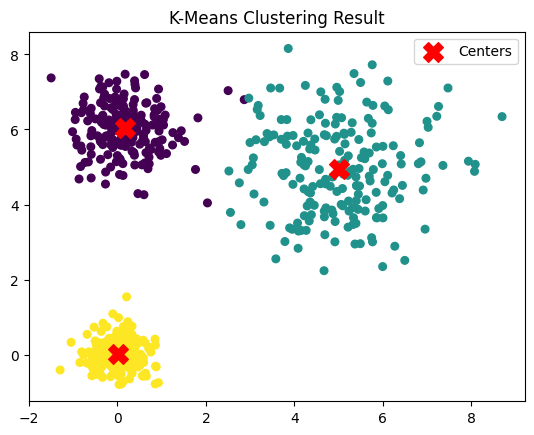

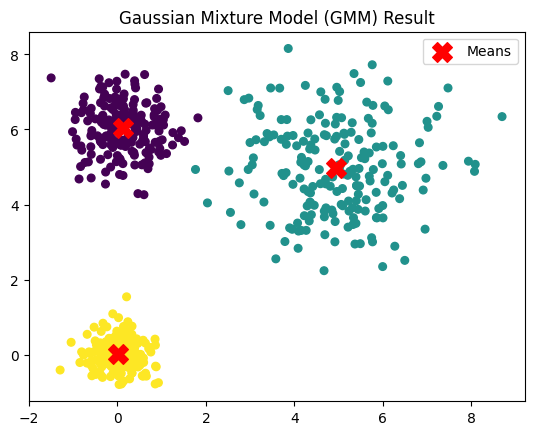

K-Means ARI: 0.9752324006948598
GMM ARI: 0.9949958125176231


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# Load the dataset
X, y_true = make_blobs(
                            n_samples=600,
                            centers=[(0,0),(5,5),(0,6)],
                            cluster_std=[0.4,1.2,0.6],
                            random_state=42
                        )

# transformation = [[0.7, -0.5], [0.3, 0.9]]
# X = np.dot(X, transformation)

# Visualize the original data
plt.scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=30)
plt.title("Original Data (True Clusters)")
plt.show()

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Visualize K-Means clustering result
plt.scatter(X[:,0], X[:,1], c=labels_kmeans[:], cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=200,cmap='viridis', label='Centers')
plt.title("K-Means Clustering Result")
plt.legend(); plt.show()

# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)

# Visualize GMM clustering result
plt.scatter(X[:,0], X[:,1], c=labels_gmm[:], cmap='viridis', s=30)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1],
            c='red', marker='X', s=200, label='Means')
plt.title("Gaussian Mixture Model (GMM) Result")
plt.legend(); plt.show()

# Evaluate clustering performance using Adjusted Rand Index (ARI)
print("K-Means ARI:", adjusted_rand_score(y_true, labels_kmeans))
print("GMM ARI:", adjusted_rand_score(y_true, labels_gmm))


### Another Solution

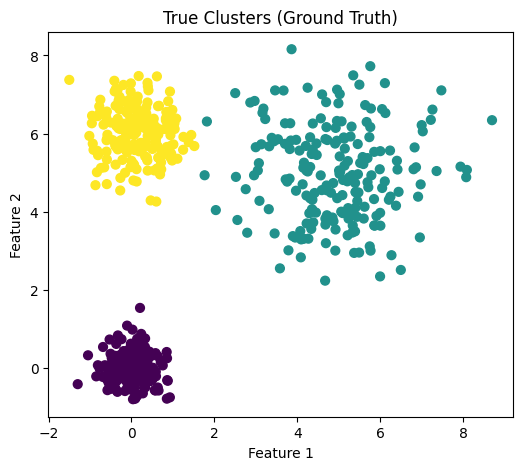

K-Means Adjusted Rand Index (ARI): 0.9752
GMM Adjusted Rand Index (ARI): 0.9950


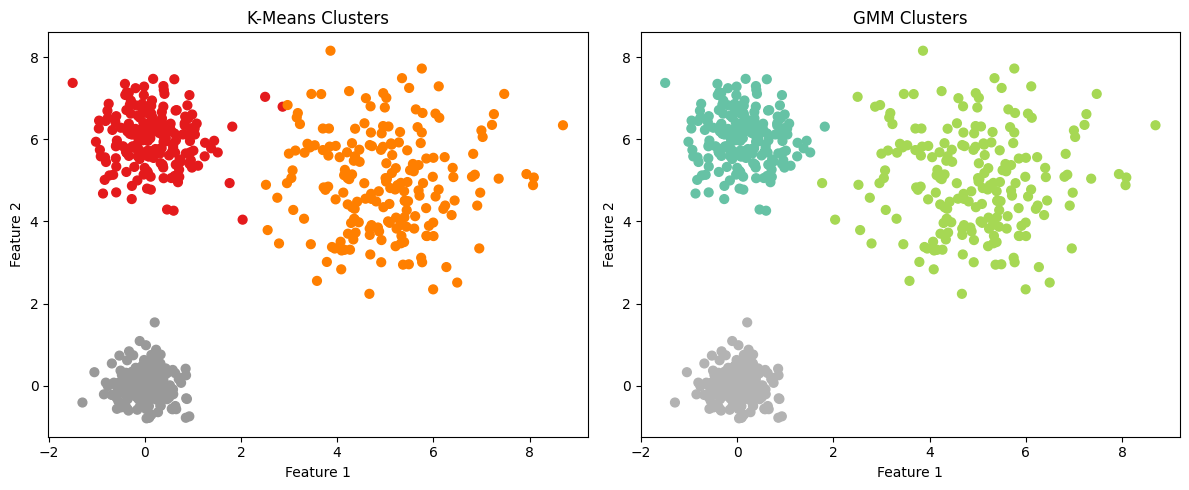

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# -----------------------------
# 1️⃣ Generate synthetic dataset
# -----------------------------
X, y_true = make_blobs(
    n_samples=600,
    centers=[[0, 0], [5, 5], [0, 6]],
    cluster_std=[0.4, 1.2, 0.6],
    random_state=42
)

# -----------------------------
# 2️⃣ Visualize the true clusters
# -----------------------------
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.title("True Clusters (Ground Truth)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# -----------------------------
# 3️⃣ Apply K-Means clustering
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# -----------------------------
# 4️⃣ Apply Gaussian Mixture Model (GMM)
# -----------------------------
gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm = gmm.fit_predict(X)

# -----------------------------
# 5️⃣ Compare using Adjusted Rand Index (ARI)
# -----------------------------
ari_kmeans = adjusted_rand_score(y_true, y_kmeans)
ari_gmm = adjusted_rand_score(y_true, y_gmm)

print(f"K-Means Adjusted Rand Index (ARI): {ari_kmeans:.4f}")
print(f"GMM Adjusted Rand Index (ARI): {ari_gmm:.4f}")

# -----------------------------
# 6️⃣ Visualize cluster results
# -----------------------------
plt.figure(figsize=(12,5))

# K-Means plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=40, cmap='Set1')
plt.title("K-Means Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# GMM plot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=40, cmap='Set2')
plt.title("GMM Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()
